In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#

import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys


4.467792179111787
NPass Loop for 1D array took 0.0001 seconds

2.234769747406474 -1.1293094367560843


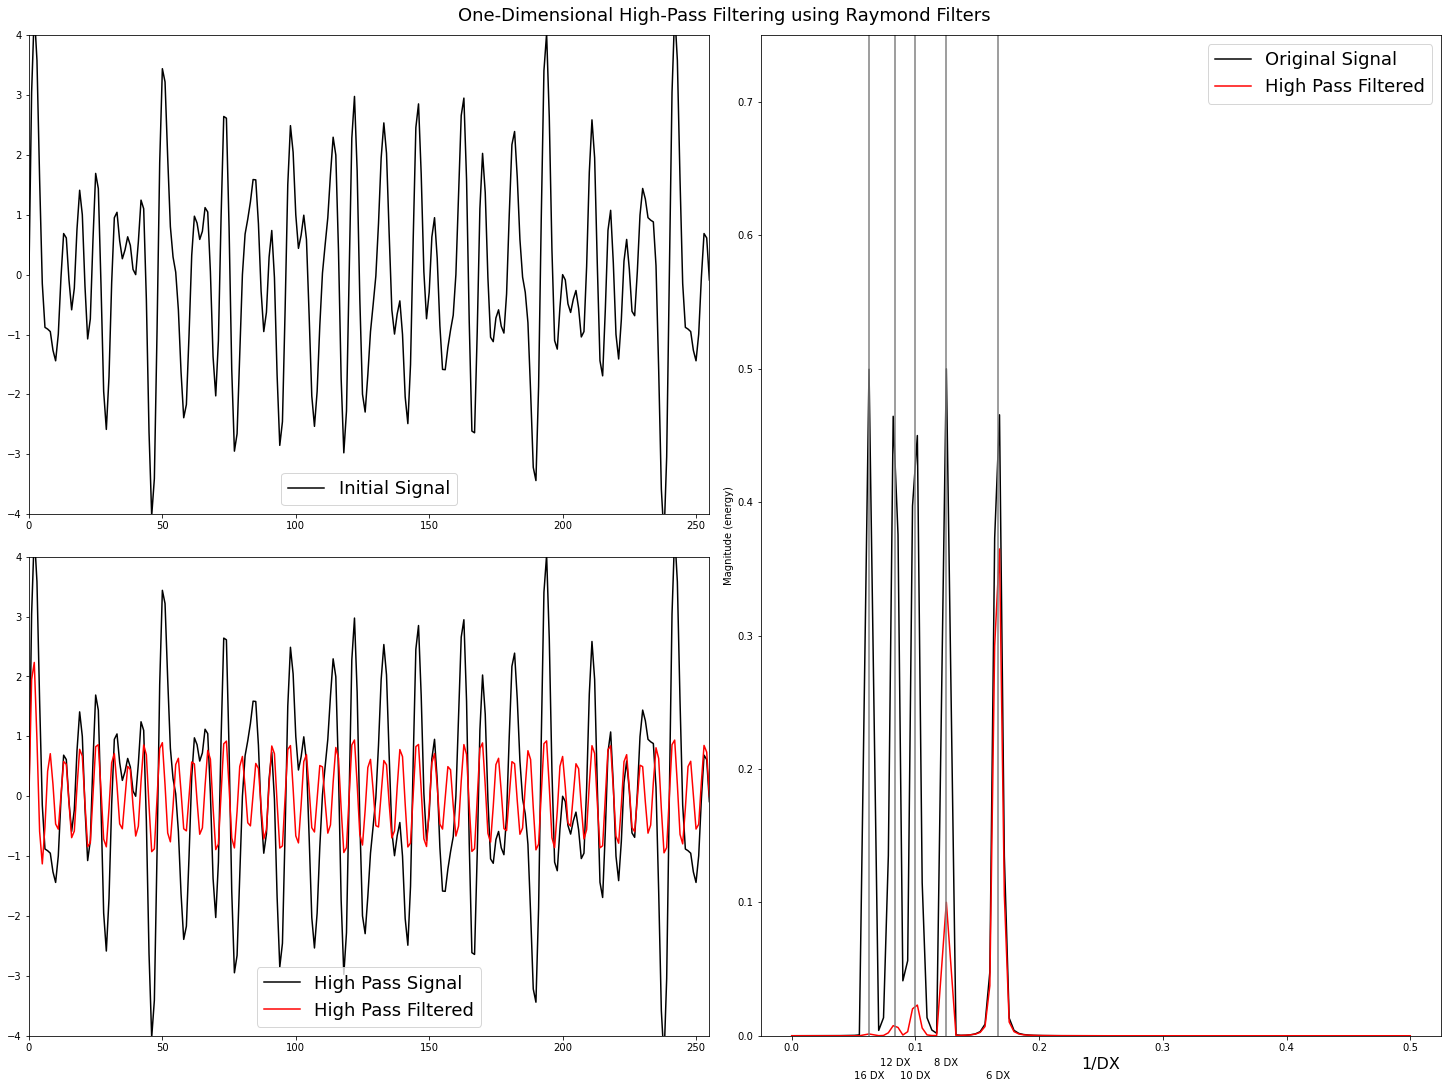

In [10]:
# Test 1D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6, RaymondFilter10, RaymondFilter6F, inverseRaymondResponse
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values
wave = [6.0, 8.0, 10.0, 12.0, 16.0]

ylim  = [-4.0,4.0]

nx    = 256

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 10

eps_values = inverseRaymondResponse(0.8, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[-1]

print(eps)

bc_reflect = False

field = np.zeros((nx,))

for w in wave:
    field = field + np.sin(2.0*np.pi*x/w)

ffield = field - RaymondFilter6F(field.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.plot(x, field, color='k', label='Total Signal')
ax1.legend(['Initial Signal'], fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# High pass plot

ax2.plot(x, field, color='k', label='High Pass Signal')
ax2.plot(x, ffield, color='r', label='High Pass Filtered')

print(ffield.max(), ffield.min())

ax2.set_xlim(xlim)
ax2.legend(fontsize=18)
ax2.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field, Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(ffield, Fs=1.0, color='r', label='High Pass Filtered')
ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

for n, w in enumerate(wave):
    ax3.plot([1.0/w,1.0/w], [0.0, 1.0], color='grey')
    
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)
plt.show()



9.00143064275053
NPass Loop for 2D array took 0.1782 seconds



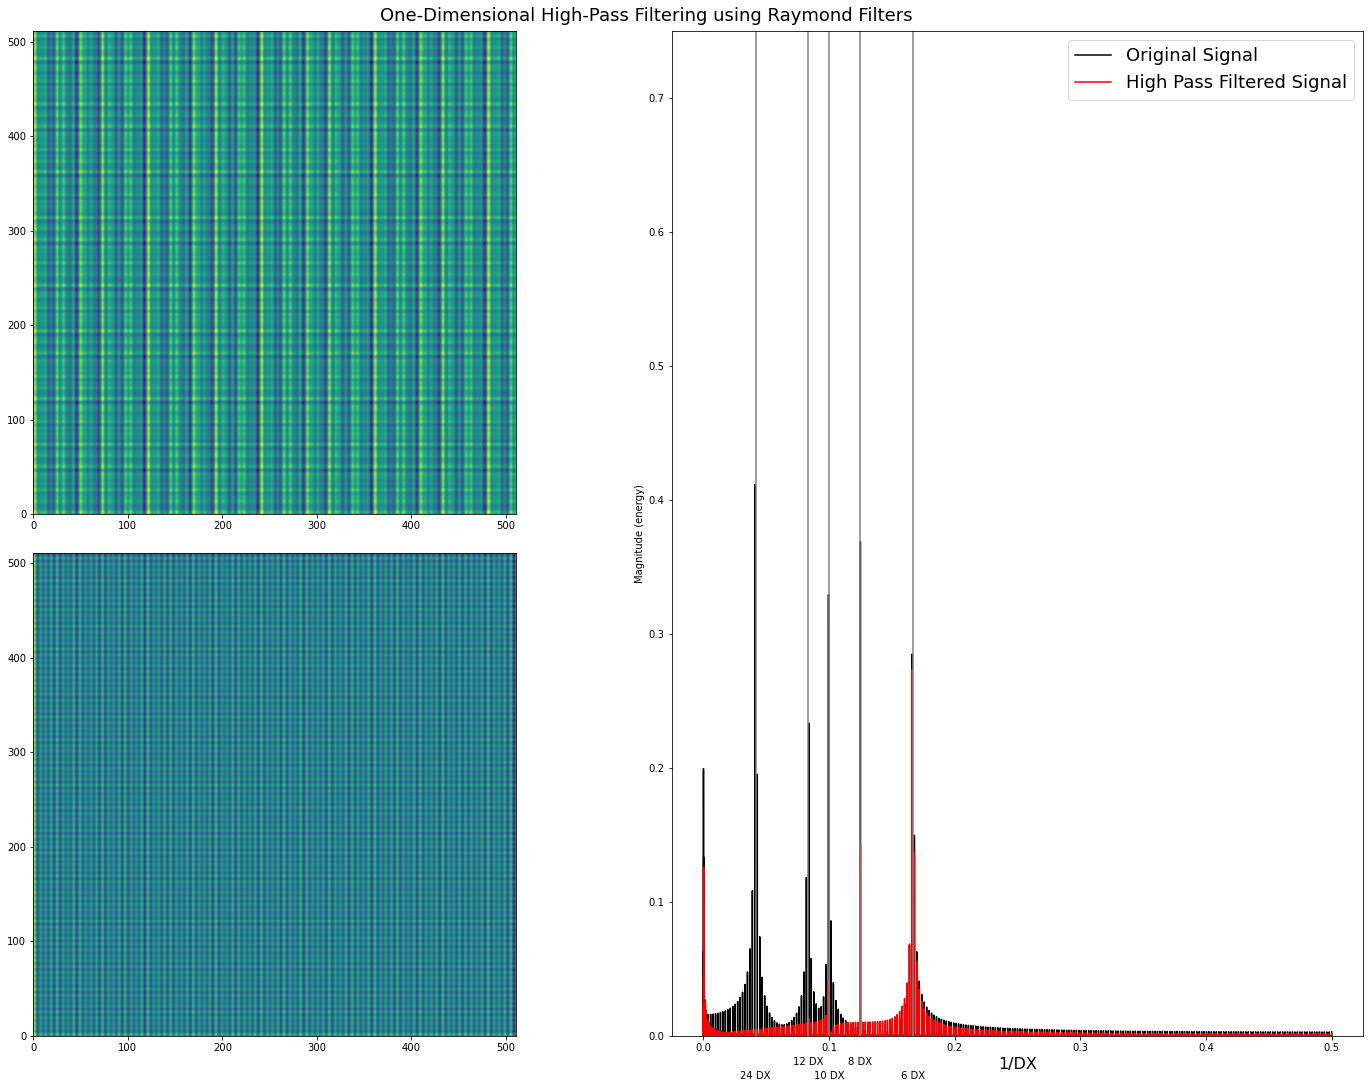

In [18]:
# Test 2D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6F, scale6npass10
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values in initial field
wave  = [6.0, 8.0, 10.0, 12.0, 24.0]

ylim  = [-2.5,2.5]

nx    = 512

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 10

eps_values = inverseRaymondResponse(0.9, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[2]

print(eps)

bc_reflect = False

field2d = np.zeros((nx,nx))

# Fixing random state for reproducibility
np.random.seed(19680801)

for w in wave:
    
    amp = np.random.uniform(size=(1,))
    
    fieldx = amp*np.sin(2.0*np.pi*x/w)
    fieldy = (1.0-amp)*np.sin(2.0*np.pi*x/w)

    for i in np.arange(nx):
        for j in np.arange(nx):
            field2d[j,i] = field2d[j,i] + fieldx[i] + fieldy[j]

hp_field = field2d - RaymondFilter6F(field2d.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.imshow(field2d)
#ax1.title('Initial Signal', fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(xlim)

ax2.imshow(hp_field)
#ax2.title('Final Signal', fontsize=18)
ax2.set_xlim(xlim)
ax2.set_ylim(xlim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field2d.flatten(), Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(hp_field.flatten(), Fs=1.0, color='r', label='High Pass Filtered Signal')


ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

for n, w in enumerate(wave):
    ax3.plot([1.0/w,1.0/w], [0.0, 1.0], color='grey')
    
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)
plt.show()


74.91651264691326
NPass Loop for 2D array took 0.1714 seconds



/var/folders/69/4qhl_6_11bd5cnfchf53rn880001k2/T/ipykernel_23542/3028224092.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([r'$\infty$', r"10", r"5", r"3.3", r"2.5", r"2.0"], fontsize=12, weight='bold' )
/var/folders/69/4qhl_6_11bd5cnfchf53rn880001k2/T/ipykernel_23542/3028224092.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels([r'$\infty$', r"10", r"5", r"3.3", r"2.5", r"2.0"],fontsize=12, weight='bold')


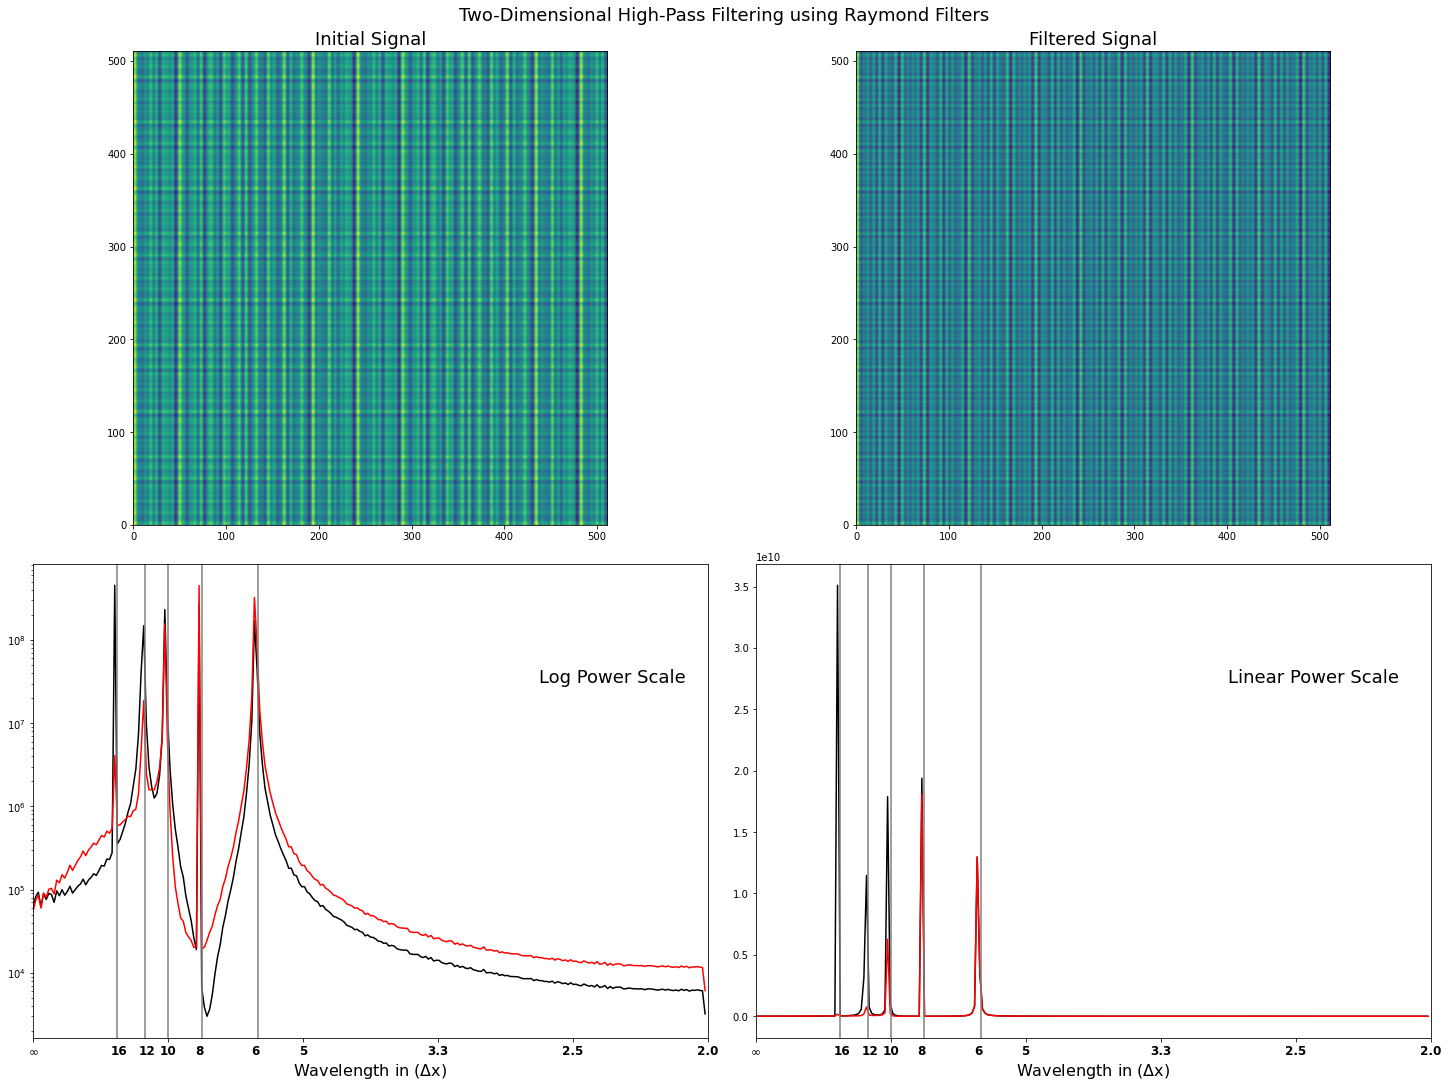

In [152]:
# Test 2D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6, RaymondFilter10, RaymondFilter6F, inverseRaymondResponse
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats

#        DX values in initial field
wave  = [6.0, 8.0, 10.0, 12.0, 16.0]

ylim  = [-2.5,2.5]

nx    = 512

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 10

eps_values = inverseRaymondResponse(0.9, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[0]

print(eps)

bc_reflect = False

field2d = np.zeros((nx,nx))

# Fixing random state for reproducibility
np.random.seed(19680801)

for w in wave:
    
    amp = np.random.uniform(size=(1,))
    fieldx = amp*np.sin(2.0*np.pi*x/w)
    fieldy = (1.0-amp)*np.sin(2.0*np.pi*x/w)

    for i in np.arange(nx):
        for j in np.arange(nx):
            field2d[j,i] = field2d[j,i] + fieldx[i] + fieldy[j]

hp_field = field2d - RaymondFilter6F(field2d.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True,figsize=(20,15))

ax1.imshow(field2d)
ax1.set_title('Initial Signal', fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(xlim)

ax2.imshow(hp_field)
ax2.set_title('Filtered Signal', fontsize=18)
ax2.set_xlim(xlim)
ax2.set_ylim(xlim)

#-------------------------------------------------------------------------------------
# Spectra plot

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def py_spectra(fld):
    
    nx = fld.shape[0]

    fourier_image = np.fft.fftn(fld)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq   = np.fft.fftfreq(nx) * nx
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm    = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    
    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, nx//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    
    return kvals, Abins, 2*(kvals-1)/nx

#-------------------------------------------------------------------------------------
#

kvals, Abins, waven = py_spectra(NormalizeData(field2d))

ax3.plot(waven, Abins, color='k')

kvals, Abins, waven = py_spectra(NormalizeData(hp_field))

ax3.plot(waven, Abins, color='r')
ax3.set_yscale('log')
ax3.set_xlim(0.0, 1.0)

ax3.set_xticklabels([r'$\infty$', r"10", r"5", r"3.3", r"2.5", r"2.0"], fontsize=12, weight='bold' )

for n, w in enumerate(wave):
       
    if w != 10:
            ax3.annotate(r"%d" % int(w), xy = (2.0/w-0.01, -0.035), xycoords='axes fraction', fontsize=12, weight='bold' )
      
    ax3.axvline(x = 2.0/w, color = 'grey', label = 'axvline - full height')
    
ax3.set_xlabel(r"Wavelength in ($\Delta$x)", fontsize=16)
ax3.annotate("Log Power Scale", xy=(0.75, 0.75), xycoords='axes fraction', color='k',fontsize=18)

plt.suptitle("Two-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)

#-------------------------------------------------------------------------------------
#
# Plot this linear/linear

kvals, Abins, waven = py_spectra(field2d)

ax4.plot(waven, Abins, color='k')

kvals, Abins, waven = py_spectra(hp_field)

ax4.plot(waven, Abins, color='r')
ax4.set_xticklabels([r'$\infty$', r"10", r"5", r"3.3", r"2.5", r"2.0"],fontsize=12, weight='bold')

for n, w in enumerate(wave):
    
    if w != 10:
            ax4.annotate(r"%d" % int(w), xy = (2.0/w-0.01, -0.035), xycoords='axes fraction', color='k',fontsize=12,weight='bold')
        
    ax4.axvline(x = 2.0/w, color = 'grey', label = 'axvline - full height')

ax4.set_xlim(0.0, 1.0)
ax4.set_xlabel(r"Wavelength in ($\Delta$x)", fontsize=16)
ax4.annotate("Linear Power Scale", xy=(0.70, 0.75), xycoords='axes fraction', color='k',fontsize=18)

plt.suptitle("Two-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)
plt.show()

In [143]:
import spectra.spectra

ImportError: dlopen(/Users/Louis.Wicker/CAM_analysis_tools/spectra/spectra.so, 2): no suitable image found.  Did find:
	/Users/Louis.Wicker/CAM_analysis_tools/spectra/spectra.so: code signature in (/Users/Louis.Wicker/CAM_analysis_tools/spectra/spectra.so) not valid for use in process using Library Validation: library load disallowed by system policy